**Aquí voy a probar todas las funcionalidades necesarias para hacer la librería de funciones que voy a ir reutilizando.  
Va a tener las siguientes partes:**  
1. Utils:   
    1. **Datos**: Funcionalidad de carga de datos, además de seleciones que no modifique los datos.
    2. **Preprocess**: Cosas como normalizacion, o algunas formas de reordenar u obtener transformaciones de los datos.  
    3. **PostProcess**: Para la parte de manejar los resultados.   
    4. **Vizutils**: Es una forma de crear representaciones sobre los datos finales o los inciales.   

2. **Models**:  Toda la parte de modelos, tanto para DNN, como las variantes de PINNs y GNN...  Añadir la opcion de selfadaptative weight en la loss.
3. **Train**: Utilidades que hacen el entrenamiento y tal. No creo que haya mucha complegidad aquí.

In [1]:
import os 
BASE_DIR=os.path.abspath("../../")

In [2]:
import sys 
sys.path.append(BASE_DIR)
DATA_DIR="/home/arturo/Documents/programacion_stuff/DeepElasticity/data/001-LinearElasticity"

In [3]:
from src.utils.data import Data
from src.models import PINN  
from src.train import Trainer
import torch 
import matplotlib.pyplot as plt 

In [4]:
data=Data("MULTIPLE_E_VALUES_NEW",10,E="0.005",base_dir=DATA_DIR)


In [5]:
data.load_data()

In [6]:
train_init_pos_main,train_disp_main,test_init_pos_main,test_disp_main,position_selected_stresses,return_stress,return_colloc_points=data.prepare_pytorch_data()

In [7]:
init_values={"nu":.4,"alpha":1.1,"E_ref":0.05}
pinn=PINN([3,80,80,80,80,80,80,3],init_values,loss_weights={"Data":None,"PDE":None,"BC":1})

['Data', 'PDE']


/home/arturo/Documents/programacion_stuff/DeepElasticity/src/models.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.E = torch.tensor((1+self.alpha)*self.E_ref,dtype=torch.float32).to(self.device)


In [8]:
pinn.w_BC

1

In [9]:
for i in pinn.parameters():
    print(i)

Parameter containing:
tensor(1.1000, device='cuda:0', requires_grad=True)
Parameter containing:
tensor([0.1359], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 6.2328e-02, -1.3066e-01, -2.8200e-01],
        [-3.8814e-02,  1.3907e-01, -1.5258e-01],
        [-3.0987e-01,  2.3153e-01,  6.9403e-02],
        [ 3.0103e-02,  9.6208e-02, -4.9317e-02],
        [-1.4086e-01, -1.0772e-02, -8.0315e-02],
        [ 8.4260e-02,  2.1000e-01, -8.2158e-02],
        [ 1.8521e-02, -2.4820e-02, -6.0064e-02],
        [-1.0746e-01, -3.5542e-02, -2.8615e-01],
        [ 4.2026e-02, -4.8494e-03,  6.2661e-02],
        [ 6.8954e-02, -1.0887e-01, -2.1404e-01],
        [-1.6113e-01, -4.6766e-02,  7.7686e-02],
        [-7.1685e-02,  1.1988e-01,  3.0946e-01],
        [-2.4325e-02, -1.4636e-02,  1.3726e-01],
        [ 4.4108e-02, -1.9498e-01,  1.7387e-01],
        [ 1.2500e-01,  1.4705e-01, -3.1177e-01],
        [-3.2758e-04, -2.1181e-01,  3.2438e-01],
        [ 2.1815e-01,  1.6445e-01, -9.7109e-

In [14]:
opt=torch.optim.Adam(pinn.parameters(),lr=1e-3)
for epoch in range(700):
    loss=pinn.loss(train_init_pos_main,train_disp_main,return_colloc_points,position_selected_stresses,return_stress)
    print("Epoch: ", epoch, "loss: ", loss.item())
    loss.backward()
    opt.step()
    opt.zero_grad()

Epoch:  0 loss:  0.5478804111480713
Epoch:  1 loss:  0.49986207485198975
Epoch:  2 loss:  0.465189129114151
Epoch:  3 loss:  0.43801355361938477
Epoch:  4 loss:  0.41491857171058655
Epoch:  5 loss:  0.395143061876297
Epoch:  6 loss:  0.3786502182483673
Epoch:  7 loss:  0.36493000388145447
Epoch:  8 loss:  0.35299962759017944
Epoch:  9 loss:  0.34212619066238403
Epoch:  10 loss:  0.3322994112968445
Epoch:  11 loss:  0.3238186240196228
Epoch:  12 loss:  0.3165610730648041
Epoch:  13 loss:  0.310062974691391
Epoch:  14 loss:  0.30409321188926697
Epoch:  15 loss:  0.29850146174430847
Epoch:  16 loss:  0.2930452823638916


KeyboardInterrupt: 

In [9]:
step_dict = {
    "step_1": {"optim": torch.optim.Adam(pinn.parameters(), lr=1e-3), 
               "epochs": 40}
    }

In [10]:
trainer=Trainer(step_dict)

In [11]:
trainer.train(pinn,data)

Epoch:  0 loss:  2.01875376701355
Epoch:  1 loss:  1.855525016784668
Epoch:  2 loss:  1.7319238185882568
Epoch:  3 loss:  1.6382428407669067
Epoch:  4 loss:  1.5653947591781616
Epoch:  5 loss:  1.5069998502731323
Epoch:  6 loss:  1.4582699537277222
Epoch:  7 loss:  1.4157618284225464
Epoch:  8 loss:  1.3776277303695679
Epoch:  9 loss:  1.34310781955719
Epoch:  10 loss:  1.3118418455123901
Epoch:  11 loss:  1.2838877439498901
Epoch:  12 loss:  1.2595950365066528
Epoch:  13 loss:  1.2385451793670654
Epoch:  14 loss:  1.219718337059021
Epoch:  15 loss:  1.2025302648544312
Epoch:  16 loss:  1.1865074634552002
Epoch:  17 loss:  1.1709166765213013
Epoch:  18 loss:  1.155522346496582
Epoch:  19 loss:  1.140852928161621
Epoch:  20 loss:  1.1272943019866943
Epoch:  21 loss:  1.114641785621643
Epoch:  22 loss:  1.1026397943496704
Epoch:  23 loss:  1.0913671255111694
Epoch:  24 loss:  1.0811009407043457
Epoch:  25 loss:  1.0720559358596802
Epoch:  26 loss:  1.0638900995254517
Epoch:  27 loss:  1.

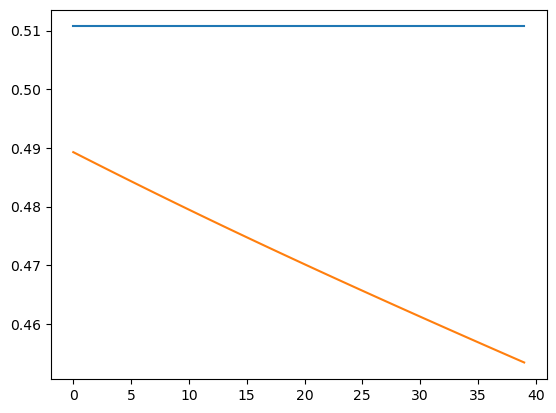

In [12]:
plt.plot(pinn.params_history["w_PDE"])
plt.plot(pinn.params_history["w_data"])
#plt.plot(pinn.params_history["w_BC"])

In [17]:
pinn.params_history.keys()

dict_keys(['E', 'alpha', 'w_data', 'w_PDE', 'w_BC'])